In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    "train", shuffle=True, color_mode='grayscale', class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'test', shuffle=False, color_mode='grayscale', class_mode='binary'
)

Found 3937 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

result = model.fit(train_gen, epochs=5, validation_data=test_gen)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 72s 577ms/step - accuracy: 0.8088 - loss: 0.8165 - val_accuracy: 0.7933 - val_loss: 0.5545
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 623ms/step - accuracy: 0.9742 - loss: 0.0691 - val_accuracy: 0.7228 - val_loss: 0.8511
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 74s 592ms/step - accuracy: 0.9786 - loss: 0.0673 - val_accuracy: 0.6843 - val_loss: 1.6827
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 587ms/step - accuracy: 0.9816 - loss: 0.0462 - val_accuracy: 0.7276 - val_loss: 1.5448
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 74s 593ms/step - accuracy: 0.9865 - loss: 0.0351 - val_accuracy: 0.7644 - val_loss: 1.2088


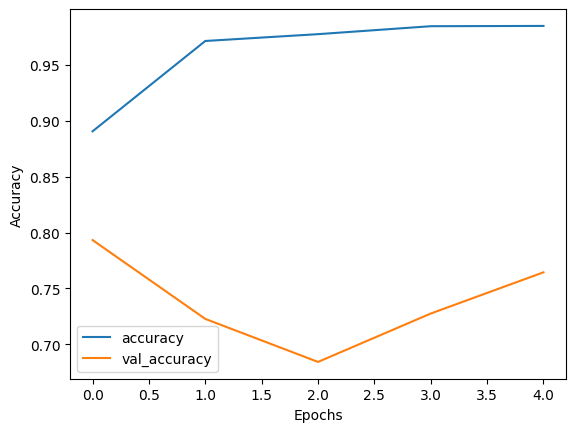

In [5]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
y_true = test_gen.classes
y_pred = model.predict(test_gen) > .5
print(classification_report(y_true, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step
              precision    recall  f1-score   support

           0       0.95      0.39      0.56       234
           1       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.69      0.70       624
weighted avg       0.81      0.76      0.73       624



20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step


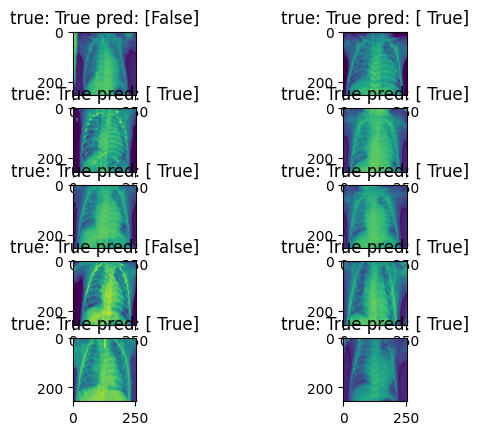

In [18]:
x, y = next(test_gen)
pred = model.predict(test_gen) > .5
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x[i])
    plt.title(f"true: {y[i] > .5} pred: {pred[i]}")
    